# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 59.8 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 58.9 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 8.2 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 57.6 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 62.7 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 65.1 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 55.3 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 59.7 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 78.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 47.5 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 71.0 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.8 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=f765d94cccbca8cadf7d3abb65822e896423f6a706a9b7fce890ef83034a2910
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.


## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [47]:
from torchvision import datasets
from torch.utils.data import DataLoader

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4,), (0.4,))
])

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

# Create test set and define test dataloader
train_loader = DataLoader(
    train_data,
    batch_size=64,
    shuffle=True
)

test_loader = DataLoader(
    test_data,
    batch_size=64
)

training_losses = []
validation_losses = []
validation_accuracies = []

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [34]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

3


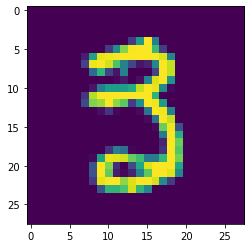

5


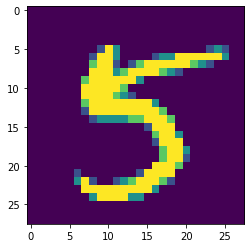

9


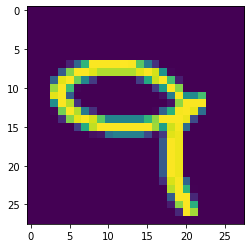

9


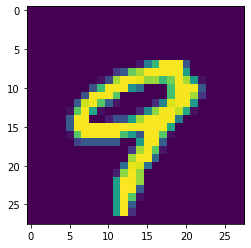

2


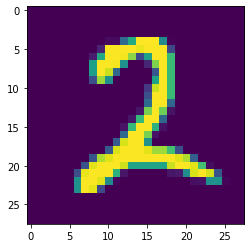

7


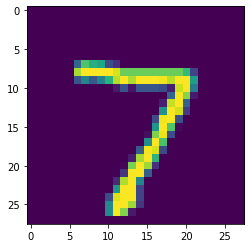

2


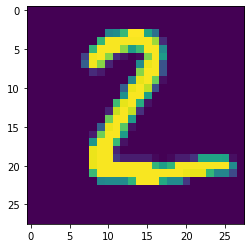

1


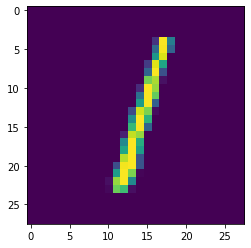

0


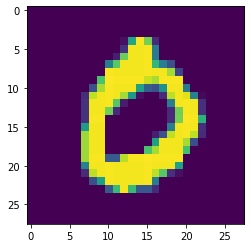

4


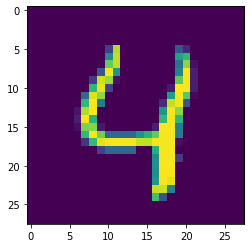

In [35]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)
show5(test_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [36]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28 * 1, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.layer4(x)
        x = F.softmax(x, dim=1)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [37]:
## YOUR CODE HERE ##
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)

In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
net.to(device)

Using device: cuda


Net(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=10, bias=True)
)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [48]:
num_epochs = 20
val_freq = 5 

# Train the model
for epoch in range(num_epochs):
   
    net.train()  
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()  
        outputs = net(images) 
        loss = criterion(outputs, labels) 
        loss.backward()  
        optimizer.step()  
        running_loss += loss.item()
    training_losses.append(running_loss / len(train_loader))

    # Print training loss
    print(f"Epoch {epoch+1}, Training Loss: {running_loss / len(train_loader)}")

    # Validation loop
    if (epoch + 1) % val_freq == 0:
        net.eval() 
        val_loss = 0.0
        correct = 0
        with torch.no_grad():
            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = net(images)  
                loss = criterion(outputs, labels) 
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()

        
        accuracy = correct / len(train_loader.dataset)
        print(f"Epoch {epoch+1}, Validation Loss: {val_loss / len(train_loader)}")
        print(f"Epoch {epoch+1}, Validation Accuracy: {accuracy:.4f}")

Epoch 1, Training Loss: 1.5261171674931735
Epoch 2, Training Loss: 1.484530830561225
Epoch 3, Training Loss: 1.4812260718742158
Epoch 4, Training Loss: 1.4790573788604249
Epoch 5, Training Loss: 1.4780297481429094
Epoch 5, Validation Loss: 1.4762958955408922
Epoch 5, Validation Accuracy: 0.9862
Epoch 6, Training Loss: 1.4766116320197262
Epoch 7, Training Loss: 1.475873727661206
Epoch 8, Training Loss: 1.474942658755825
Epoch 9, Training Loss: 1.4739695699738542
Epoch 10, Training Loss: 1.473779097040579
Epoch 10, Validation Loss: 1.4727893630578828
Epoch 10, Validation Accuracy: 0.9893
Epoch 11, Training Loss: 1.4729950705062607
Epoch 12, Training Loss: 1.4721564974612011
Epoch 13, Training Loss: 1.471974378709854
Epoch 14, Training Loss: 1.4712709447722445
Epoch 15, Training Loss: 1.4708441606462637
Epoch 15, Validation Loss: 1.4695393045319678
Epoch 15, Validation Accuracy: 0.9921
Epoch 16, Training Loss: 1.470344157742539
Epoch 17, Training Loss: 1.469873317777475
Epoch 18, Training

Plot the training loss (and validation loss/accuracy, if recorded).

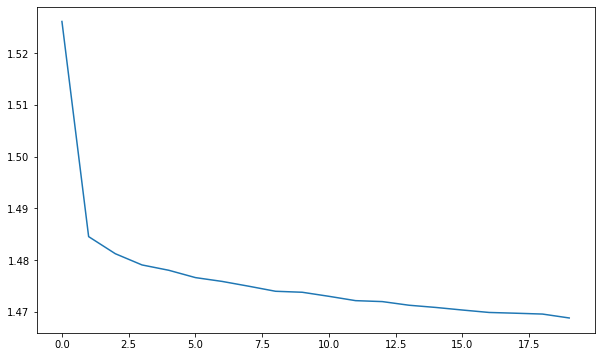

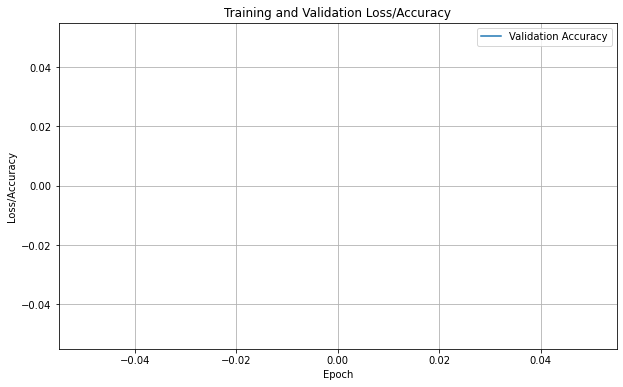

In [49]:
# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(training_losses, label="Training Loss")

# Plot validation loss
plt.plot(validation_losses, label="Validation Loss")

# Plot validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(validation_accuracies, label="Validation Accuracy")

# Add labels and legend
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.title('Training and Validation Loss/Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [50]:
## YOUR CODE HERE ##
correct_predictions = 0
total_predictions = 0

with torch.no_grad():  
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predictions = torch.max(outputs, 1)  
        total_predictions += labels.size(0)
        correct_predictions += (predictions == labels).sum().item()

# Calculate and print accuracy
accuracy = (correct_predictions / total_predictions) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 97.78%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [54]:

optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)

print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

criterion = nn.CrossEntropyLoss()


def train_model(model, optimizer, criterion, train_loader, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad() 
            outputs = model(images) 
            loss = criterion(outputs, labels)  
            loss.backward()  
            optimizer.step()  
            running_loss += loss.item()

        
        print(f"Epoch {epoch+1}, Training Loss: {running_loss / len(train_loader)}")


train_model(net, optimizer, criterion, train_loader, num_epochs=10) 

Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 1e-05, 'nesterov': False, 'maximize': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7]}]
Epoch 1, Training Loss: 1.4668837154089516
Epoch 2, Training Loss: 1.466918701810369
Epoch 3, Training Loss: 1.4669573665427755
Epoch 4, Training Loss: 1.466820206596399
Epoch 5, Training Loss: 1.4667569194267045
Epoch 6, Training Loss: 1.466752949808198
Epoch 7, Training Loss: 1.4667187654641645
Epoch 8, Training Loss: 1.4667663941505367
Epoch 9, Training Loss: 1.4668814214562047
Epoch 10, Training Loss: 1.4666875772384693


## Saving your model
Using `torch.save`, save your model for future loading.

In [55]:
## YOUR CODE HERE ##
torch.save

<function torch.serialization.save(obj, f: Union[str, os.PathLike, BinaryIO, IO[bytes]], pickle_module=<module 'pickle' from '/opt/conda/lib/python3.7/pickle.py'>, pickle_protocol=2, _use_new_zipfile_serialization=True) -> None>